In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns
import os

In [3]:
print(f"The number of GPUs: {len(tf.config.list_physical_devices('GPU'))}")
!nvidia-smi -L

The number of GPUs: 0
GPU 0: NVIDIA GeForce GTX 1650 (UUID: GPU-ac3f731c-b660-0261-772f-ea87cc13f762)


In [4]:
# import os

# # Function to rename multiple files
# def main():

# 	folder = 'data\\red'
# 	for count, filename in enumerate(os.listdir(folder)):
# 		dst = f'red_{str(count)}.jpg'
# 		src = f'{folder}\\{filename}' # foldername/filename, if .py file is outside folder
# 		dst = f'{folder}\\{dst}'
		
# 		# rename() function will
# 		# rename all the files
# 		os.rename(src, dst)

# # Driver Code
# if __name__ == '__main__':
	
# 	# Calling main() function
# 	main()

In [5]:
filenames = os.listdir('data/combined')

alluvial = []
black = []
desert = []
red = []
for files in filenames:
    if files[0:8] == 'alluvial':
        alluvial.append(files)
    elif files[0:5] == 'black':
        black.append(files)
    elif files[0:6] == 'desert':
        desert.append(files)
    elif files[0:3] == 'red':
        red.append(files)
        
print(len(alluvial),len(black),len(desert),len(red))

204 200 200 200


In [6]:
# original_path = 'data/combined'
# new_path = 'images_resized/'


# from PIL import Image
# import os, sys

# def resize_rename_rotate(srcdir,srcfile, targetdir="", size=(224,224)):
#     #srcfile_path : the complete path to source file
#     src_path = srcdir+srcfile

#     targetfile = os.path.splitext(srcfile)
#     extension = os.path.splitext(srcfile)[1]
     
#     if srcfile != targetfile:
#         try :
#             im = Image.open(src_path)  # open file
#             im = im.rotate(90) # degrees counter-clockwise
#             im = im.resize(size) # resize the file
#             im.save(targetdir+targetfile[0]+'__'+".jpg")
#         except IOError:
#             print ("cannot change image for ", srcfile)

# if __name__=="__main__":
#   targetdir = "data/combined"
#   srcdir = "images_resized/"

#   for file in os.listdir(srcdir):
#      resize_rename_rotate(srcdir,file,targetdir)

In [7]:
# from PIL import ImageFile
# from PIL import Image
# ImageFile.LOAD_TRUNCATED_IMAGES = True

# path = 'images_resized/combined'
# new_path = 'images_resized1/combined'

# for i in range(len(filenames)):
#     filename = os.listdir(path)[i]
#     f_img = path+"/"+filename
#     img = Image.open(f_img)
#     img = img.resize((224, 224)) #(width, height)
#     img = img.convert('RGB')
#     new_img_path = new_path+'/'+filename
#     img.save(new_img_path)


# filenames = os.listdir('images_resized1/combined')

# alluvial = []
# black = []
# desert = []
# red = []
# for files in filenames:
#     if files[0:8] == 'alluvial':
#         alluvial.append(files)
#     elif files[0:5] == 'black':
#         black.append(files)
#     elif files[0:6] == 'desert':
#         desert.append(files)
#     elif files[0:3] == 'red':
#         red.append(files)
# print(len(alluvial),len(black),len(desert),len(red))

In [8]:
import glob
import cv2

image_directory = 'images_resized1/combined/'
image_extensions = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]
soil_images = np.asarray([cv2.imread(file) for file in files])

soil_images.shape

(804, 224, 224, 3)

In [9]:
labels = []
for i in range(0,len(filenames)):
    files = filenames[i]    
    if files[0:8] == 'alluvial':
        labels.append(0)
    elif files[0:5] == 'black':
        labels.append(1)
    elif files[0:6] == 'desert':
        labels.append(2)
    elif files[0:3] == 'red':
        labels.append(3)

labels.count(0), labels.count(1),labels.count(2), labels.count(3)

(204, 200, 200, 200)

In [10]:
X = soil_images
Y = np.asarray(labels)

In [11]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=35,stratify=Y)

In [13]:
X_train.shape,X_test.shape

((643, 224, 224, 3), (161, 224, 224, 3))

In [14]:
Y_train.shape,Y_test.shape

((643,), (161,))

In [15]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [16]:
import tensorflow_hub as hub
mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

# number_of_classes = 4

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 4,226,884
Trainable params: 1,968,900
Non-

In [17]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

history = model.fit(X_train_scaled,Y_train,epochs=2,validation_split=0.25,batch_size=16)

Epoch 1/2


c:\Users\RUSHIL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


31/31 [==============================] - 20s 513ms/step - loss: 1.0531 - acc: 0.5290 - val_loss: 0.5907 - val_acc: 0.8075
Epoch 2/2
31/31 [==============================] - 14s 446ms/step - loss: 0.3235 - acc: 0.8838 - val_loss: 0.2847 - val_acc: 0.8944


In [18]:
model.save_weights('abc.h5')

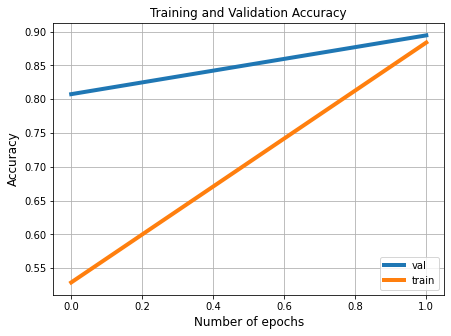

In [19]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_acc'],linewidth = 4)
plt.plot(history.history['acc'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

In [20]:
# Validation 

from PIL import ImageFile
from PIL import Image

img_test = cv2.imread(r'D:\Soil_Pred\test_data\test15.png')
img_resize = cv2.resize(img_test,(224,224))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Alluvial Soil")
elif input_label == 1:
    print("Black Soil")
elif input_label == 2:
    print("Desert Soil")
elif input_label == 3:
    print("Red Soil")

1/1 [==============================] - 1s 562ms/step
0
Alluvial Soil
